<a href="https://colab.research.google.com/github/E23A48/MachineLearning_LSTM/blob/main/MachineLearning_TA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TA2**
**MACHINE LEARNING**
2020-2

Integrantes:
*   Piero Herrera
*   Camilo Silva


## **Introducción y motivación de uso**

*Para 1997*, las redes neuronales recurrentes o **recurrent neural networks** – RNN por sus siglas en inglés -, eran utilizadas para diversas aplicaciones tales como el procesamiento de voz o la composición musical, tal y como detallan Hochreiter et. Al en ***“Long Short-Term Memory”***. La principal ventaja de este tipo de red frente a los enfoques tradicionales es el hecho de poder procesar secuencias de datos mediante conexiones de retroalimentación que permitan cierta persistencia de los datos a corto plazo. 

*Por otro lado*, un problema conocido para la época era el hecho de que los algoritmos existentes para decidir qué poner en la memoria a corto plazo no funcionaban de la forma óptima. Además, almacenar información en intervalos de tiempos prolongados (memoria a largo plazo o ***long-term memory***), era un problema que tomaba demasiado tiempo debido a un error conocido como *flujo de retorno de error insuficiente*, lo que impide que se realice el aprendizaje de secuencias de datos largos y que fue estudiado a profundidad por Hochreiter en 1991 en su tesis de diplomado “Untersuchungen zu dynamischen neuronalen Netzen” (Investigaciones sobre redes neuronales dinámicas). 

Esto motivó a Sepp Hochreiter y Jürgen Schmidhuber a presentar en 1997 ***“Long Short-Term Memory”***, una arquitectura de red recurrente que lograba solucionar estos errores, principalmente, mediante la definición de un concepto conocido como “***celda de memoria***” que era incorporado a las redes recurrentes tradicionales, dichas celdas pueden mantener su valor durante un periodo de tiempo corto o largo, lo que aporta robustez a la arquitectura, permitiéndole operar sobre distintos tipos de secuencias con diferentes tipos de extensiones con un resultado óptimo, diferenciandolo del enfoque de las RNN. Específicamente, nos permiten abordar el problema de dependencia a largo plazo.

*En la actualidad*, la popularidad de la arquitectura recurrente **LSTM** ha crecido a tal punto de ser utilizado en diferentes tipos de aplicaciones, tales como reconocimiento de escritura o reconocimiento de voz por parte de grandes compañías como, por ejemplo, *IBM* o *Google*.


## **Cómo funciona**

*Como ya especificamos*, las redes neuronales **LSTM** son un caso especial de *RNN*, que son capaces de recordar datos relevantes en una secuencia de entrada, y preservarlo durante diferentes instantes de tiempo.

Podríamos, por ejemplo, hacer un símil entre cómo funcionan las **LSTM** y cómo el cerebro humano analiza las secuencias. Por ejemplo, mientras leemos un artículo científico entendemos la información en un momento actual a partir de las palabras leídas en momentos previos, no desechamos la información obtenida en cada momento pues sería complicado entender las palabras actuales. Si las *RNN* recordaban únicamente palabras previas, las **LSTM** buscan entonces recordar la información más importante leídas desde el primer instante al instante actual y enviar conocimiento hacia instantes futuros.

En el siguiente gráfico, podemos observar, a la izquierda la arquitectura clásica de una *RNN*. Por otro lado, a la derecha, tenemos la arquitectura de una **LSTM**. Como se muestra, la **LSTM** cuenta con una entrada y una salida adicional, y son justamente estos elementos quienes conforman la ***celda de memoria***, que es la base del funcionamiento de este tipo de redes


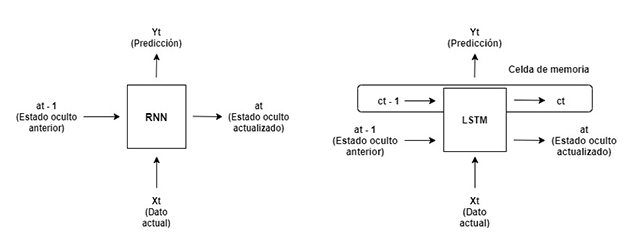

*Ahora bien*, para poder controlar cómo fluye la información dentro de la celda de memoria, se usan 3 tipos de compuertas. ***Forget gate***, que permite olvidar partes de la información para recordar nuevos datos, ***update gate***, que permite añadir nuevos datos a la memoria y ***output gate*** que permite crear el estado oculto actualizado.

*Cada compuerta* esta compuesta por los mismos elementos. Una capa de *red neuronal*, una capa de *función sigmoidal*, y una capa de *elemento multiplicador*. El resultado de la capa sigmoidal representa cuánta información de cada componente debe dejar pasarse, actuando como válvula, el valor será 0 si es que no se deja pasar nada, o 1, dejar pasar todo. Es de esta forma en la cual la red **LSTM** logra que la información más importante persista desde el primer instante en que esta ingresa. La siguiente imagen grafica la forma en que actúan estas compuertas.


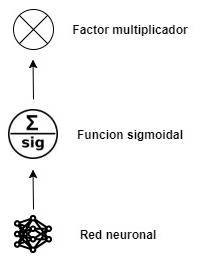

Como ya especificamos, cada una de estas compuertas cumple un rol vital para mantener la información a lo largo de la red. De forma aún más detallada, podemos listar las operaciones que se realizan para lograr dicho fin:

La compuerta forget gate, toma el estado oculto anterior y la entrada actual, los transforma y los lleva a la función sigmoidal, obteniendo el vector $f_{t}$ , la siguiente operación define la forma en la que esta trabaja, $f_{t}=sigmoidal(W_{f}[a_{t-1}, x_{t}] + b_{f})$. En este punto, puede ocurrir que uno de los valores de dicho vector de salida pueda ser 0 o cercano a 0, con lo que se eliminaría toda o parte la información, por otro lado si es 1 o cercano a 1, la información llegará a la celda de memoria, como se mencionó anteriormente.

La compuerta update gate, por otro lado, toma el estado oculto anterior y la entrada actual nuevamente y genera la función $u_{t}$, de la siguiente forma $u_{t}=sigmoidal(W_{i}[a_{t-1}, x_{t}] + b_{i})$.

Una vez que se generan los datos de las compuertas update y forget gate, se puede actualizar la celda de memoria, para ello en un primer momento se multiplica el factor anterior de la celda $c_{t - 1}$, con el valor generado por la puerta forget $f_{t}$, $f_{t} * c_{t - 1}$. Luego, se crea un vector de valores candidatos que formarán parte de la nueva memoria, $c_{t}=sigmoidal(W_{c}[a_{t-1}, x_{t}] + b_{c})$, además, se multiplicará por el valor generado por la puerta update  $u_{t} * c_{t}$, la operación final de aplicar estas operaciones es la siguiente: $f_{t} * c_{t - 1} + u_{t} * c_{t}$.

Finalmente, para calcular el estado oculto se hace uso de la output gate, como ya se mencionó, la cual es una versión de la celda de memoria, escalada en un rango de $[-1, 1]$ mediante la función tangente hiperbólica, la operación que realiza la output gate para generar el resultado del próximo estado oculto, es la siguiente: $o_{t}=o(W_{o}[a_{t-1}, x_{t}] + b_{o})$, terminando así el proceso de la LSTM.


## **Bibliotecas**

A continuación, algunas de las librerías que incorporan esta red neuronal en el lenguaje de programación *Python*:



1.   [Neon](https://github.com/NervanaSystems/neon): Framework de Intel de aprendizaje profundo basada en el rendimiento. Incorpora, entre otros, CNN, RNN, LSTM, GRU, BatchNorm y más. Actualmente el proyecto se encuentra descontinuado segun su repositorio oficial.
2.   [OpenDeep](https://github.com/vitruvianscience/OpenDeep): Framework de aprendizaje profundo creado desde cero en Theano, basado en flexibilidad y facilidad de uso.
3. [GroundHog](https://github.com/lisa-groundhog/GroundHog): Framework de Python sobre Theano, únicamente incorpora modelos complejos de redes neuronales recurrentes. Además, admite una variedad de capas recurrentes, como DT-RNN, DOT-RNN, RNN y LSTM. El proyecto se encuentra descontinuado.
4. [Keras](https://github.com/keras-team/keras): API de DeepLearning escrita en Python que se ejecuta sobre la plataforma de TensorFlow. Se encuentra descontinuado, y sugiere usar la API incorporada en TensorFlow según su repositorio oficial.

5. [Pytorch](https://github.com/pytorch/pytorch): La conocida biblioteca de aprendizaje automático también incorpora este tipo de redes neuronales, según su documentación oficial.

6. [Clstm](https://github.com/tmbdev/clstm): Implementación del modelo de red neuronal recurrente escrita en C++ que hace uso de la biblioteca Eigen para calculos numéricos. Cuenta con un API para Python implementada.

7. [Tensorflow](https://github.com/tensorflow/tensorflow): Biblioteca de código abierto que mantiene Google, ampliamente utilizada en aprendizaje automático. Incorpora Keras, descrita anteriormente, y por tanto las redes neuronales LSTM.


Luego de comparar las múltiples opciones de bibliotecas, consideramos que las opciones más recomendadas son ***Pytorch*** y ***Keras Tensorflow***, debido a que cuentan con el respaldo de la comunidad, y son ampliamente utilizadas, además de contar con amplia documentación, por lo que, para un usuario nuevo, puede resultar sencillo empezar a utilizar este tipo de redes neuronales.


## **Ejemplos de aplicaciones**

Las redes LSTM tienen diversas aplicaciones tales como predicciones de series, reconocimiento de voz, controlar robots, traducción de idiomas y lenguaje de señas, etc. A continuación mencionaremos algunas de las apliaciones en estos sectores, y como funciona y/o han sido implementadas.

### **Creación de música mediante el uso de las redes LSTM**

**Data**

En primer lugar se realiza la extracción de la data con <a href="http://web.mit.edu/music21/">Music21</a>, un conjunto de herramientas que proporciona Python con fines académicos para el aprendizaje de la teoría musical. Gracias a este conjunto de herramientas se podrá obtener los archivos MIDI de manera sencilla.

En esta ocación el conjunto de datos corresponte a la banda sonora del videojuego Final Fantasy compuesta en piano.

Extracto de archivo MIDI:


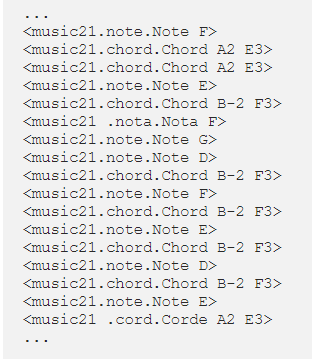

Estos datos están divididos en notas y acordes . Las notas contienen información sobre:

*Tono*: Frecuencia del sonido, representado por las letras [A, B, C, D, E, F, G]

*Octava*: Conjunto de tonos que usa en un piano.

*Desplazamiento*: Ubicación de la nota en la pieza.

Dicha esta información, para poder generar música precisa, la red neuronal debe de poder predecir qué nota o acorde es el siguiente. Es por ello que la matriz de predicción contendrá cada nota y acorde del conjunto de entrenamiento.

**Tratamiento de la data**

Primero realizan la carga de datos en una matriz:

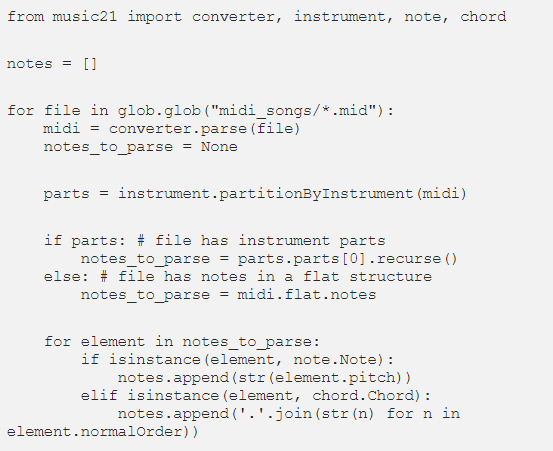

Cada archivo se sube usando la función ***converter.parse***, con lo que se obtiene la lista de notas y acordes del archivo. Luego se agrega el tono y el acorde para que la decodificación de la salida sea más sencilla.

Se crea un función para mapear desde los datos categóricos hasta los numéricos, debido a que la red neuronal funciona mucho mejor con datos numéricos enteros que con cadenas de caracteres. 

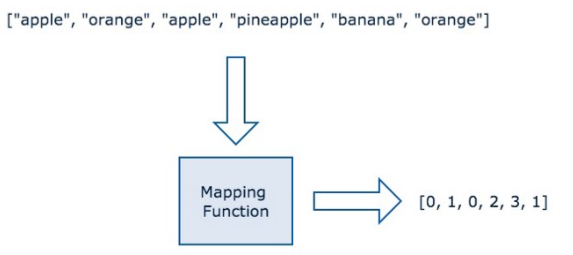

Realizado el mapeado se crean las secuencias de entrada a la red y sus respectivas salidas. Las salidas de cada secuencia será la primer nota o acorde que viene después de la secuencia de notas en la secuencia de entrada. Para este trabajo se determinó una longitud de 100 notas/acordes, lo que significa que para predecir la siguiente nota, la red tiene como apoyo las 100 anteriores notas (se recomienda entrenar la red con distintas longitudes para ver los diferentes resultados). Por ultimo se realiza la normalización de los datos de entrada y **one-hot encode** en las salidas

**Modelo**


Para el diseño de la arquitectura se usaron 4 capas: LSTM, Dropout Layersm Dense Layers y Activation Layer. 

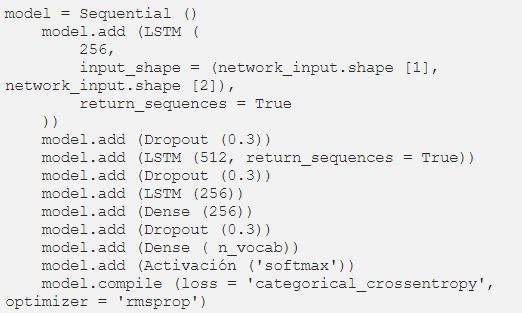

Para el entranamiento se hace uso de la función ***model.fit()*** de Keras, indicando las respectivas épocas (200).

**Generación de Música**

A través de ***model.load_weights ('weights.hdf5')*** se cargan los pesos guardados anteriormente por el entrenamiento. Se elige un indice aleatorio de la lista como punto de partida lo que permite ejecutar el código sin realizar cambios y obtener resultados diferentes cada ejecuci.

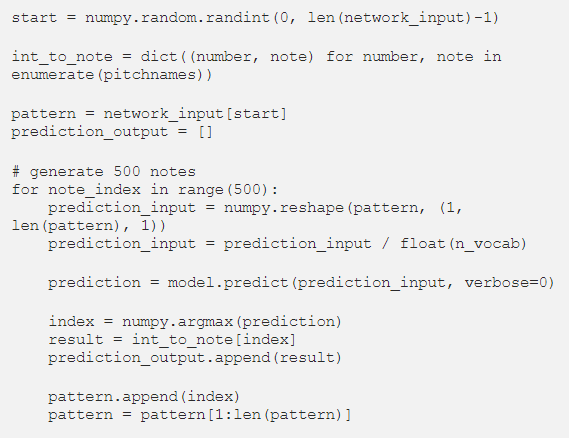



Se generan 500 notas con el uso de la red que es un espacio considerable para crear una melodía.

Pasos para la creación de la melodía:

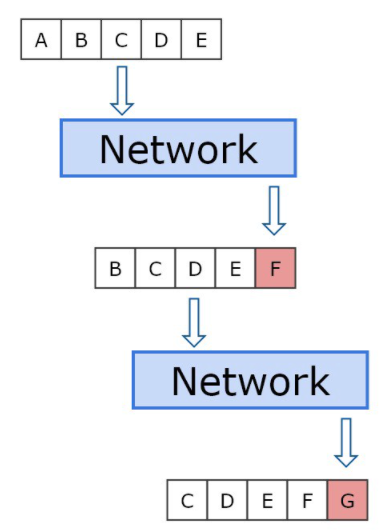

Se tiene una secuencia inicial que ingresa a la red, la cual arroja como nota resultante **F**. Se elimina la primera nota de la secuencia, se agrega la obtenida y finalmente se ingresa la nueva secuencia a la red para continuar con el proceso

La elección de la salida se basa en la probabilidad de las clases. La clase con la probabilidad más alta es la elegida y se convierte en la siguiente nota

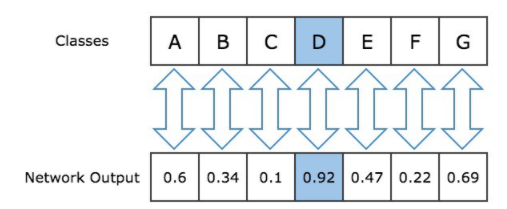

Finalmente se recopila todo en una sola matriz, se convierte esta matriz en una de notas y acordes. Se crea una lista de notas y acordes generados por la red neuronal y se crea un objeto Music21 con el fin de que pueda leerse como archivo de audio.

**Resultados de la música generada por la red neuronal:**

La siguiente imagen muestra las partituras de la melodía que generó la red LSTM.



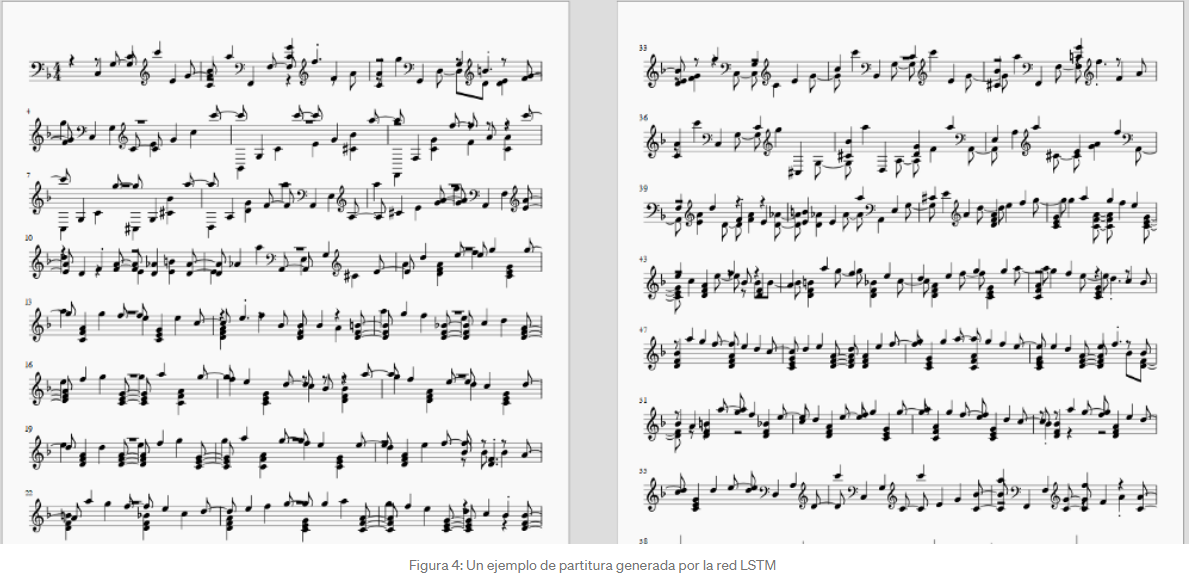

Puede acceder al <a href="https://soundcloud.com/sigur-ur-sk-li/sets/music-generated-by-a-neural-network">***Soundcloud***</a> para escuchar las melodías creadas.

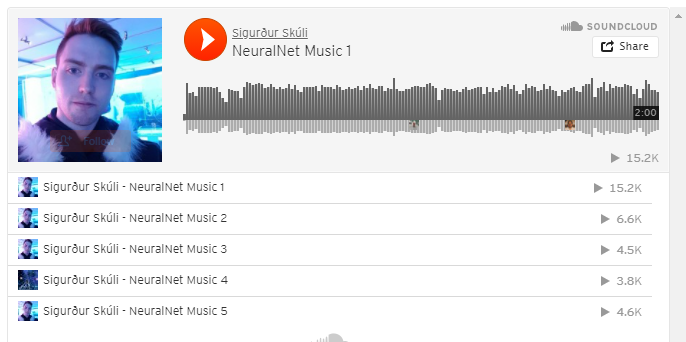

### **Predicción de la propagación del COVID-19**



El COVID-19 ha sido el principal actor en este año 2020, pues es un virus que ha puesto en riesgo a la humanidad, afectando a todos los sectores posibles. Debido a que este virus siguió creciendo de manera descontrolada allá entre los meses de marzo y abril, fue necesario predecir como se iba a dar la propagación de este virus en las distintas partes del mundo. En el artículo realizado por Neeraj Gupta y Anuradha Tomar se presenta la predicción del numero de casos de COVID-19 y el efecto de las medidas preventivas en la India haciendo uso del método de estimación basado en datos **LSTM** y el ajuste de curvas. Se tomaron en consideración diversos parámetros como: numero de casos positivos, casos recuperados, fallecidos, etc.




**Modelo**

Como mencionan en el articulo, las RNN han demostrado ser efectivas para la predicción, debido a que extraen las características más relevantes de las muestras de entrenamiento. Además, el que sean buenas procesando datos y que tengan un gran potencial en la predicción de series de tiempo con gran almacen de información fue un buen impulsivo para decidirse por implementar este modelo de arquitectura.

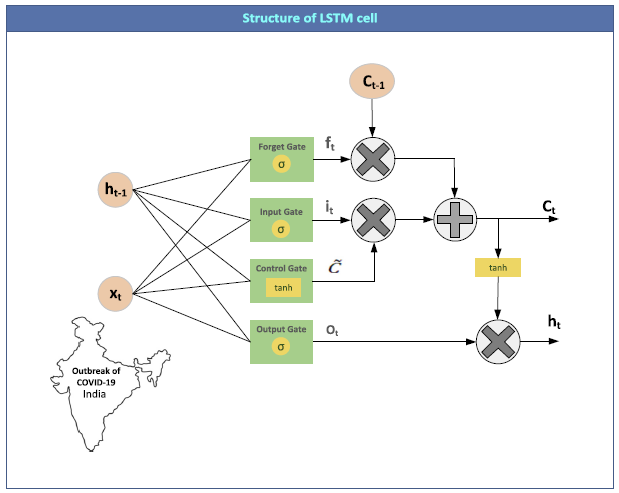

**Data**

La data que se empleó en esta predicción corresponde a los reportes de casos en la India desde el 30 de enero (día en el que se reportó el primer caso de COVID en este país) hasta el 4 de abril. El 80% de la data es usada como entrenamiento, mientras que el 20% restante es usada para la validación.

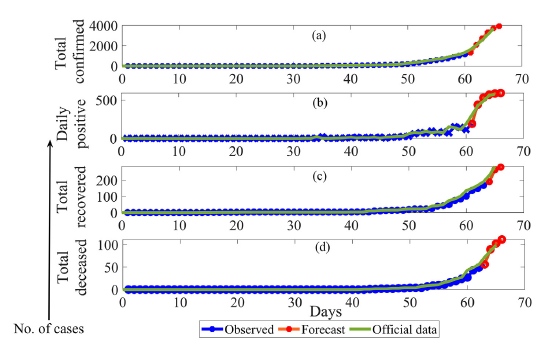

En la figura anterior podemos observar los casos confirmados (a), casos positivos (b), total de recuperados (c) y total de fallecidos (d). Además se encuentran graficasdas las curvas de la data entrenada, la oficial de test y la de predicción. Podemos observar que el número pronosticado de casos positivos confirmados totales es muy similar a la data oficial. Esta comparación se hizo con los 

También se ha aplicado la técnica de ajuste de curvas, considerando dos objetivos: 


*   Verificar el método anterior
*   Analizar el impacto del bloqueo y la distancia social considerando los diversos índices de dispersión.


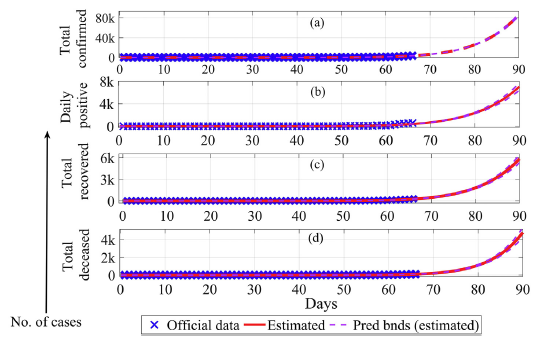

La tasa de recuperación de los casos confirmados también es alta, sin embargo, el tiempo que tarda el paciente en recuperarse es grande. Con un gran número de pacientes, aumenta el estrés en los recursos médicos, por lo que también se requiere una predicción del tiempo necesario para recuperar la disposición y utilización adecuadas de los recursos disponibles.



De acuerdo al siguiente gráfico se puede observar que es posible estimar la curva con los datos disponibles. Sin embargo, la principal limitación son los datos disponibles los cuales generan una curva casi plana de la cual no se puede descifrar mucho.

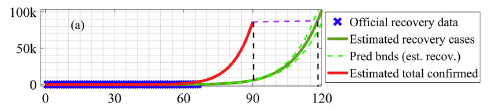

**Efecto de medidas adoptadas para la prevención**

Para medir el efecto de las medidas de prevención de contagio del COVID-19 se realizó un análisis variando r desde 0.001 hasta 2.3 (r indica el ratio de transmisión). Para ello se considera un escenario en la India donde el valor de r antes del confinamiento era 2.3, es decir, una persona podía contagiar a 2.3 personas, y luego del confinamiento es reducido hasta 0.15. En la siguiente imagen podemos ver las comparaciones realizadas usando los diversos ratios de transmisión.

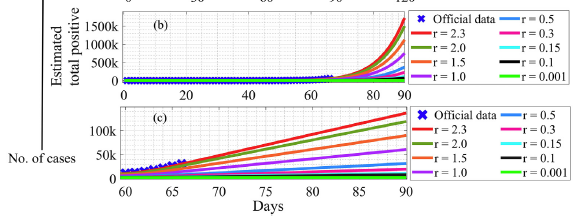

En el caso del segundo gráfico de la figura anterior se considera un escenario con el 6 de abril de 2020 con 4289 número de casos positivos como inicio y con la aplicación de las medidas de aislamiento. Podemos observar claramente que las medidas preventivas de aislamiento social y encierro lograrán reducir el número de casos y aplanar la curva. Es por ello que las medidas deberán de adoptarse después del 6 de abril.

### **Traducción de idiomas**

Otra de las aplicaciones que podemos encontrar es la traducción de idiomas. En esta ocasión se mostrará una implementación realizada por Vaibhav Kumarm, quien usó un modelo <a href="https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html">Seq2Seq</a> (secuencia a secuencia) el cual consiste en entrenar modelos que pueden convertir secuencias de un dominio específico en secuencias de otro dominio, como por ejemplo, palabras del inglés al francés. Este modelado de Seq2Seq lo realiza el codificador y decodificador LSTM.

**Proceso**

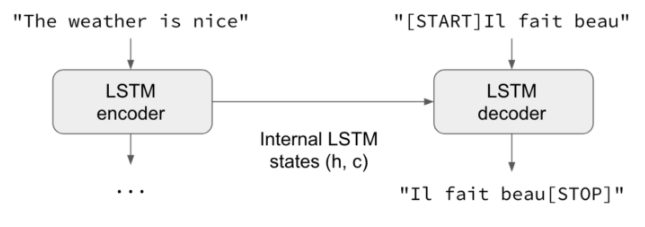

El objetivo principal fue convertir las frases cortas en inglés a la correspondiente en frances, mediante la implementación del aprendizaje profundo en el modelado Seq2Seq.

**Data**

Este artículo hace uso del <a href="https://www.kaggle.com/jannesklaas/frenchenglish-bilingual-pairs">Dataset</a> obtenido en Kaggle, el cual contiene oraciones en francés con su respectiva traducción al inglés.


Muestra del Dataset:

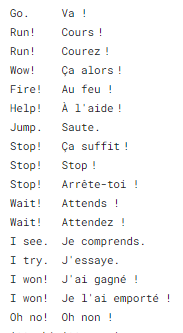

**Implementación del modelo Seq2Seq**

Se comienza con la importación de librerías. Similar a las anteriores aplicaciones, también se hará uso de la librería TensorFlow

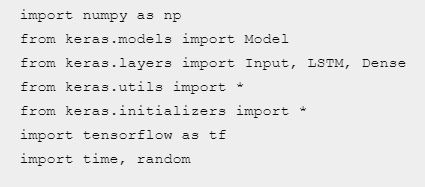

Se especifica los valores de los hiperparámetros:

* Tamaño del lote para el entrenamiento

* Dimensionalidad latente para el espacio de codificación

* Número de muestras para entrenar

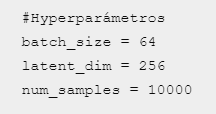

Luego se realiza la vectorización de datos donde se produce la lectura del archivo que contiene las frases en inglés y en francés. En este proceso los documentos de texto se convierten en vectores característicos.

Una vez que se obtuvo el conjunto de datos con todas las características, se define el codificador y decodificador de datos de entrada y los datos de destino para el decodificador.

Las lineas de código de la siguiente imagen definen la secuencia de entrada para el codificador y procesarán esta secuencia. Después de eso, se configurará un estado inicial para el decodificador usando 'encoder_states'.

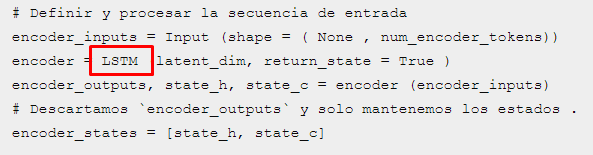

In [ ]:
# Usando `encoder_states` configure el decodificador como estado inicial. 
decoder_inputs = Input (shape = ( None , num_decoder_tokens)) 
decoder_lstm = LSTM (latent_dim, return_sequences = True , return_state = True ) 
decoder_outputs, _, _ = decoder_lstm (decoder_inputs, initial_state = encoder_states)
decoder_dense = Denso (num_decoder_tokens, activación = 'softmax' ) 
decoder_outputs = decoder_dense (decoder_outputs)

Por último, se define el modelo final que convertirá `encoder_in_data` &` decoder_in_data` en `decoder_target_data`.

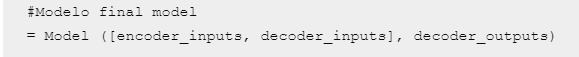

Resumen

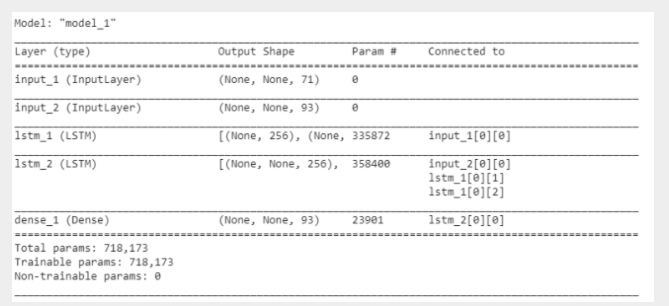

Forma de los datos

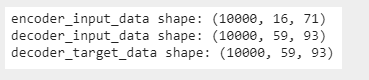

Visualización del modelo

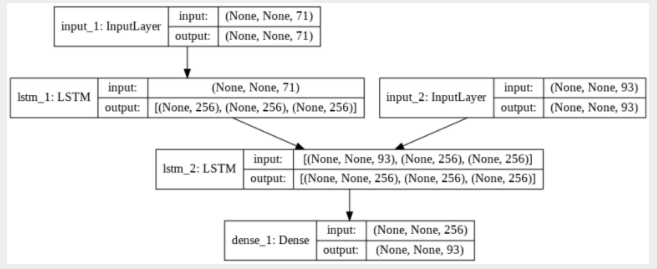

Concluida esta parte, se continúa con el entrenamiento del modelo final. Para el ejemplo del artículo el número de épocas con el que se entrenó el modelo fue de 50.

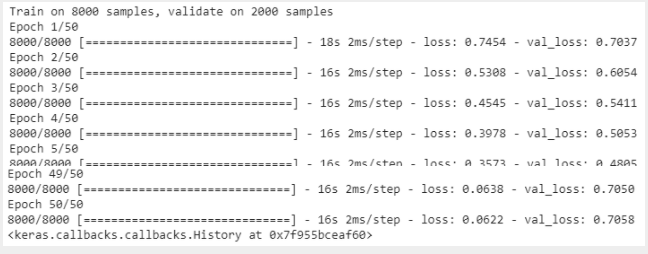

Luego del entrenamiento, se define el modelo de muestra utilizando los parámetros del modelo entrenado. A partir de aquí se define la secuencia de decodificación del texto que pasa al modelo como secuencia de entrada, es decir, el módulo en donde se realiza la traducción de idioma de entrada al de destino. Aquí la secuencia de entrada se codifica en los vectores de estado. El vector de estado y la secuencia objetivo se pasan al decodificador y éste produce la predicción para el siguiente carácter. Usando estas predicciones, se muestrea el siguiente carácter y se agrega a la secuencia objetivo. El proceso se repite para generar la secuencia completa.

Finalmente, se comprueba el modelo para decodificar la secuencia de entrada en la secuencia de destino, es decir, traducir las oraciones en inglés a las oraciones en francés.

Resultados:

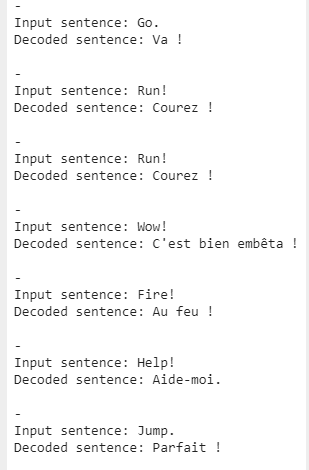


Como podemos observar, el modelo ha podido convertir las frases correctamente a su traducción en inglés correspondiente.

Otras aplicaciones encontradas:

* <a href="https://youtu.be/dKBKNOn3gCE">Predicción del precio de acciones</a>  
* <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0146917">Identificación de un idioma</a> 

## **Conclusiones**

* Las redes neuronales ***LSTM*** son un tipo especial de redes neuronales recurrentes que nos permiten abordar específicamente el problema de *dependencia a largo plazo*, mediante el uso de una unidad conocida como celda de memoria, que permite que la información que entra a la red persista a través del tiempo, modificando, eliminando y actualizando la información gracias a su mecanismo de compuertas a lo largo del proceso. Mantener la información a lo largo del proceso le brinda a esta red cierta robustez que permitirá que sus resultados sean óptimos para datos secuenciales que requieran una mayor dependencia entre los mismos. Siendo esta la principal ventaja frente a su predecesor. 

* En general, el uso de redes neuronales para predicciones no es tan simple como implementarlas directamente en cualquier situación. La complejidad que existe en el mundo real (como es, por ejemplo, el caso de la predicción del precio de las acciones) es mucho mayor. Sin embargo, es posible realizar un proyecto de Machine Learning basado en redes neuronales lo bastante sólido, el cual sea eficaz y de utilidad para lograr la predicción más acertada. Esto se logrará realizando un propio análisis y profundizando más en el tema al que se quiere enfocar la predicción.

* El ajuste de los hiperparámetros y de las épocas para el entrenamiento de los modelos LSTM es la clave para encontrar el modelo que mejor se ajuste a la investigación o proyecto que se está realizando. Es recomendable realizar varias pruebas y variaciones en el entrenamiento del modelo.

* Existen diversos factores que pueden llegar a tener un impacto significativo en el entrenamiento del modelo LSTM. En las predicciones de contagiados por COVID-19 por ejemplo, factores como estación, fines de semana, feriados, pruebas tomadas, sectores afectados, contagiados acumulados, etc. Estos factores se convertirían en nuevas características por analizar, lo que ayudaría a obtener mejores resultados en la predicción.





## **Referencias**

* Hochreiter, S., & Schmidhuber, J. (1997, 1 diciembre). Long Short-term Memory. ResearchGate. https://www.researchgate.net/publication/13853244_Long_Short-term_Memory

* Özlü, A. (2020, 13 junio). Long Short Term Memory (LSTM) Networks in a nutshell. Medium. https://medium.com/@ahmetozlu93/long-short-term-memory-lstm-networks-in-a-nutshell-363cd470ccac

* Yan, S. (2018, 21 junio). Understanding LSTM and its diagrams - ML Review. Medium. https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714

* Introducing deep learning and long-short term memory networks. (2018). IBM Developer. https://developer.ibm.com/technologies/iot/tutorials/iot-deep-learning-anomaly-detection-1/

* Arquitecturas de aprendizaje profundo. (2015). IBM Developer. https://developer.ibm.com/es/technologies/deep-learning/articles/cc-machine-learning-deep-learning-architectures/

* ¿Qué es una red LSTM? | Curso redes neuronales recurrentes - Parte 4. (2019, 20 julio). [Vídeo]. YouTube. https://www.youtube.com/watch?v=1BubAvTVBYs

* Tomar, A., & Gupta, N. (2020). Prediction for the spread of COVID-19 in India and effectiveness of preventive measures. Science of the Total Environment, 728. https://www.sciencedirect.com/science/article/abs/pii/S0048969720322798

* Sigurður Skúli (2017). How to Generate Music using a LSTM Neural Network in Keras. Towards Data Science. https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

* Vaibhav Kumarm (2020). Sequence-to-Sequence Modeling using LSTM for Language Translation. Analytics India Mag. https://analyticsindiamag.com/sequence-to-sequence-modeling-using-lstm-for-language-translation/